In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
x = np.linspace(0,5,11)
y = x ** 2

In [2]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [3]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

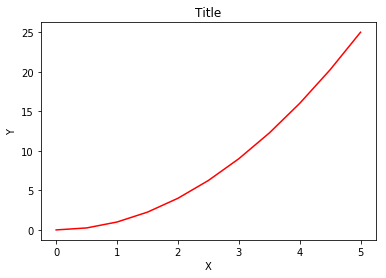

In [4]:
plt.plot(x, y, 'r')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Title')
plt.show()

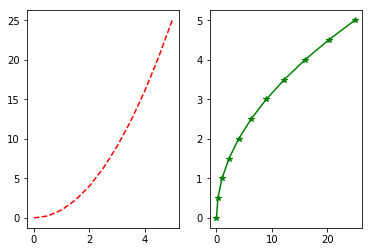

In [5]:
plt.subplot(1,2,1)
plt.plot(x,y,'r--')
plt.subplot(1,2,2)
plt.plot(y,x,'g*-')

In [6]:
df1 = pd.read_csv('city_data.csv')
df2 = pd.read_csv('ride_data.csv')

In [7]:
df3 = pd.merge(df1, df2, on='city')

In [8]:
df3

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [24]:
driver_count = df3.groupby('city')['driver_count'].max()
avg_fare = df3.groupby('city')['fare'].mean()
rides = df3.groupby('city')['ride_id'].count()
df4 = pd.DataFrame(data={"Average Fare" : avg_fare,
                        "Number of Drivers" : driver_count,
                        "Number of Rides" : rides})
df4

,Average Fare,Number of Drivers,Number of Rides
city,,,
Amandaburgh,24.641667,12,18
Barajasview,25.332273,26,22
Barronchester,36.422500,11,16
Bethanyland,32.956111,22,18
Bradshawfurt,40.064000,7,10
Brandonfort,35.437368,10,19
Carriemouth,28.314444,52,27
Christopherfurt,24.501852,41,27
Colemanland,30.894545,23,22


AttributeError: Unknown property palette

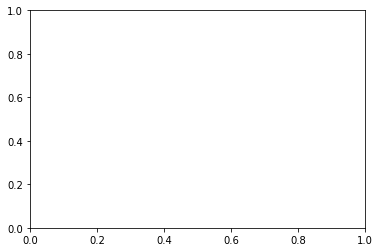

In [32]:
plt.scatter(x='Average Fare',y='Number of Rides',s=y*10,alpha=0.5,data=df4)
plt.xlabel('Avg. Fare')
plt.ylabel('# of Rides')
plt.show()

Text(0.5, 1.0, '% of Total Fares')

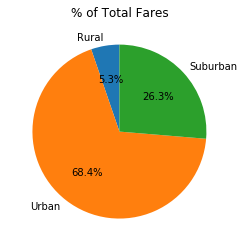

In [42]:
labels = ['Rural', 'Urban', 'Suburban']
rs = df3[df3['type'] == 'Rural'].count()['type']
us = df3[df3['type'] == 'Urban'].count()['type']
ss = df3[df3['type'] == 'Suburban'].count()['type']
sizes = [rs, us, ss]
plt.pie(sizes, labels=labels, startangle=90, autopct = '%1.1f%%')
plt.title("% of Total Fares")